<a href="https://colab.research.google.com/github/mahdiSheykhiGithub/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and load Data

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense , Dropout , Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 2

In [ ]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

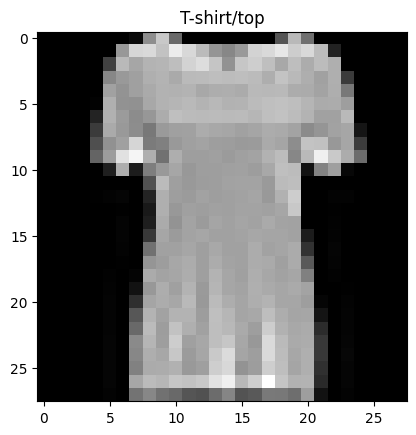

In [ ]:
index = 10
plt.imshow(x_train[index], cmap='gray')
plt.title(f'{class_name[y_train[index]]}')
plt.show()

# Modeling

**Normalization**

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_test = utils.to_categorical(y_test)
y_train = utils.to_categorical(y_train)

**Model Architecture**

In [ ]:
reg = keras.regularizers.l2(0.001)

In [ ]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28), name='Flatten'))
model.add(Dense(units = 300, activation = 'relu', kernel_regularizer = reg, name='Hidden1'))
model.add(Dropout(0.55, name='Drop1'))
model.add(Dense(units = 300, activation = 'relu', kernel_regularizer = reg, name='Hidden2'))
model.add(Dropout(0.55, name='Drop2'))
model.add(Dense(units = 300, activation = 'relu', kernel_regularizer = reg, name='Hidden3'))
model.add(Dropout(0.55, name='Drop3'))
model.add(Dense(units = 10, activation='softmax', name='Output'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden1 (Dense)             (None, 300)               235500    
                                                                 
 Drop1 (Dropout)             (None, 300)               0         
                                                                 
 Hidden2 (Dense)             (None, 300)               90300     
                                                                 
 Drop2 (Dropout)             (None, 300)               0         
                                                                 
 Hidden3 (Dense)             (None, 300)               90300     
                                                                 
 Drop3 (Dropout)             (None, 300)              

**Compile Model**

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.0001)
metrics = tf.metrics.CategoricalAccuracy()
loss = tf.losses.CategoricalCrossentropy()

model.compile(optimizer = opt, loss = loss, metrics = metrics)

**Fit Model**

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2, batch_size = 100, verbose = 2)

Epoch 1/100
480/480 - 8s - loss: 2.4938 - categorical_accuracy: 0.4397 - val_loss: 1.6594 - val_categorical_accuracy: 0.7198 - 8s/epoch - 16ms/step
Epoch 2/100
480/480 - 6s - loss: 1.7286 - categorical_accuracy: 0.6793 - val_loss: 1.4095 - val_categorical_accuracy: 0.7820 - 6s/epoch - 12ms/step
Epoch 3/100
480/480 - 7s - loss: 1.4938 - categorical_accuracy: 0.7460 - val_loss: 1.2686 - val_categorical_accuracy: 0.8142 - 7s/epoch - 14ms/step
Epoch 4/100
480/480 - 5s - loss: 1.3441 - categorical_accuracy: 0.7805 - val_loss: 1.1723 - val_categorical_accuracy: 0.8291 - 5s/epoch - 11ms/step
Epoch 5/100
480/480 - 8s - loss: 1.2396 - categorical_accuracy: 0.7992 - val_loss: 1.0891 - val_categorical_accuracy: 0.8367 - 8s/epoch - 16ms/step
Epoch 6/100
480/480 - 5s - loss: 1.1479 - categorical_accuracy: 0.8157 - val_loss: 1.0103 - val_categorical_accuracy: 0.8491 - 5s/epoch - 11ms/step
Epoch 7/100
480/480 - 7s - loss: 1.0724 - categorical_accuracy: 0.8234 - val_loss: 0.9541 - val_categorical_accu

# Testing and Evaluation

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4215 - categorical_accuracy: 0.8869


[0.42149853706359863, 0.886900007724762]

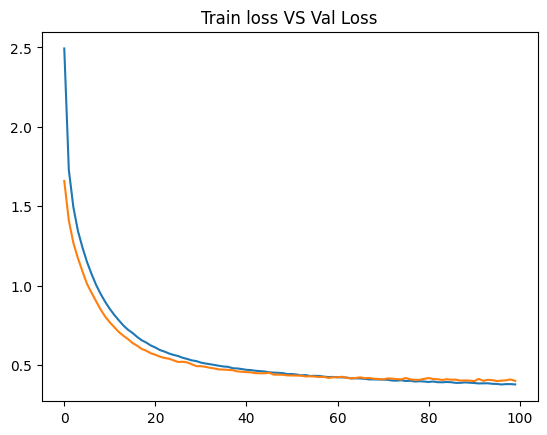

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss VS Val Loss')
plt.show()

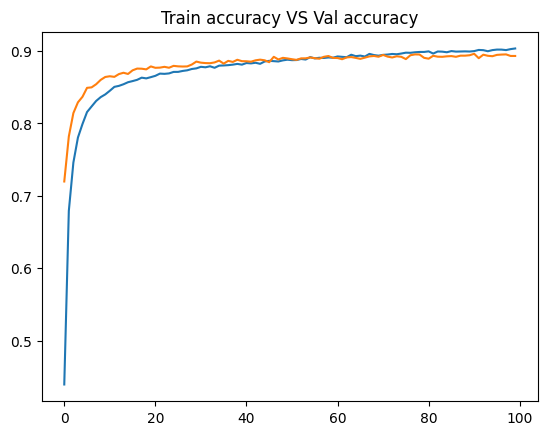

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Train accuracy VS Val accuracy')
plt.show()

313/313 [==============================] - 2s 5ms/step


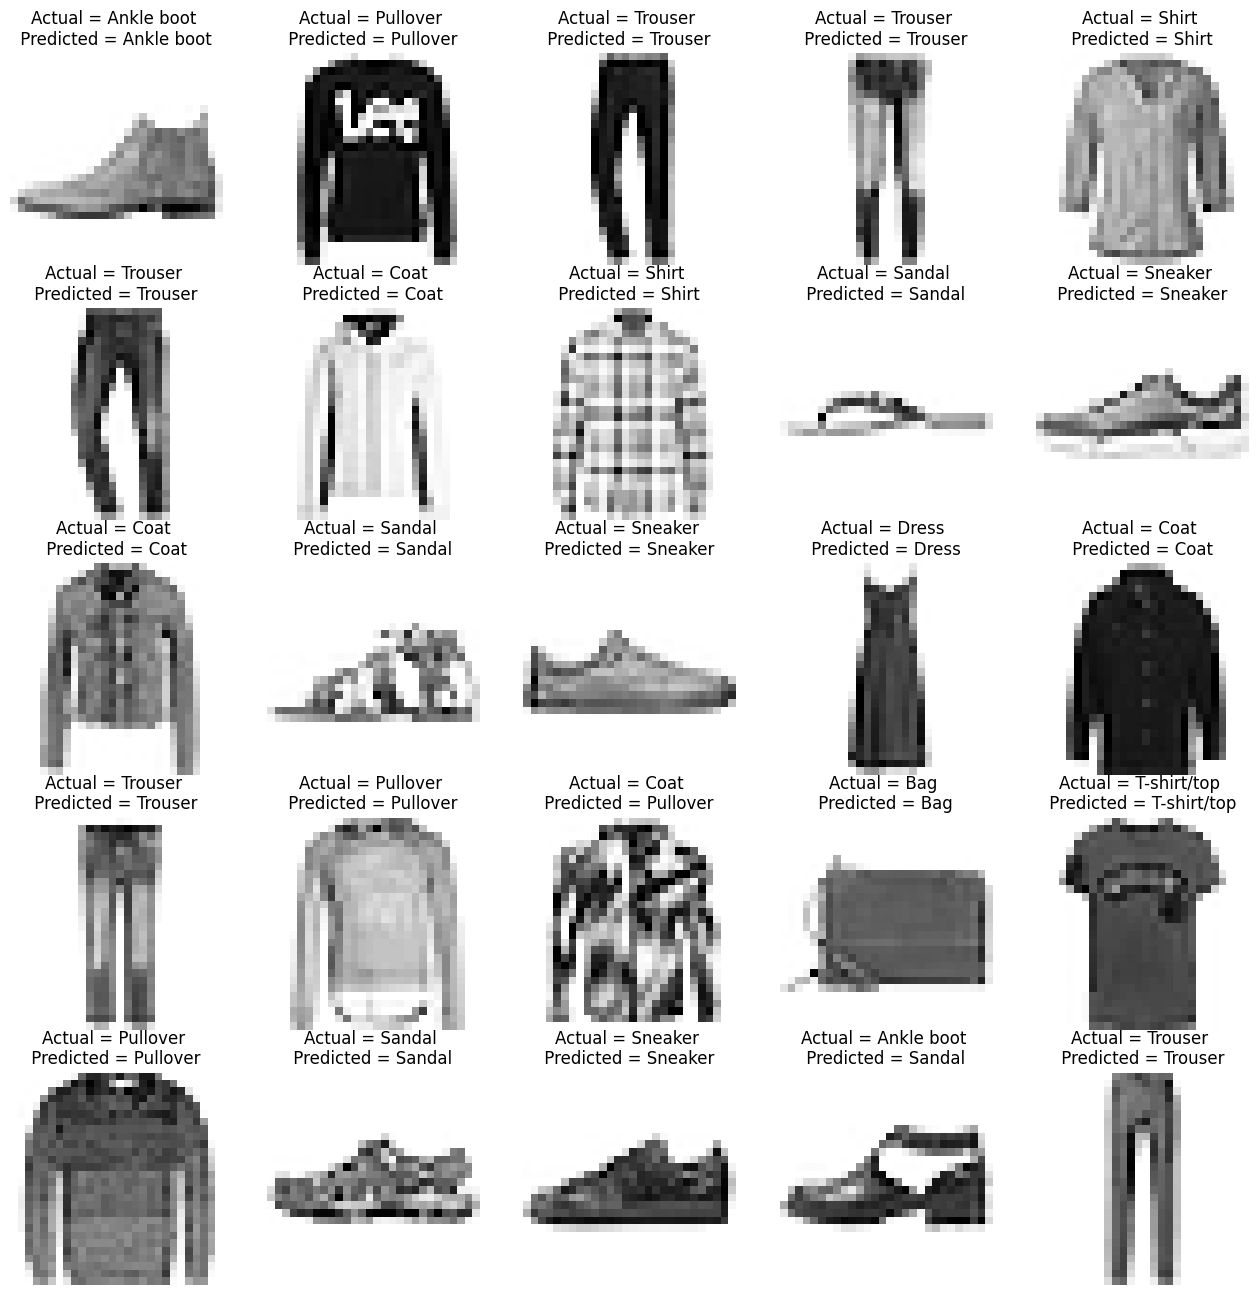

In [ ]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i],cmap='Greys')
    plt.axis('off')
    plt.title("Actual = {} \n Predicted = {} ".format(class_name[y_test[i].argmax()],class_name[y_pred[i]]))

# Save Model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Fashion_MNIST/Fashion_MNIST_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
